In [2]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as lg

In [4]:
np.linspace(0.1, 1.0, 10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [5]:
Lx = 2.0
Ly = 1.0
nx = 8
ny = 5
dx = Lx / nx
dy = Ly / ny


X = np.linspace(dx/2, Lx - dx/2, nx)
Y = np.linspace(dy/2, Ly - dy/2, ny)
X, Y = np.meshgrid(X, Y, indexing='ij')

In [6]:
X

array([[0.125, 0.125, 0.125, 0.125, 0.125],
       [0.375, 0.375, 0.375, 0.375, 0.375],
       [0.625, 0.625, 0.625, 0.625, 0.625],
       [0.875, 0.875, 0.875, 0.875, 0.875],
       [1.125, 1.125, 1.125, 1.125, 1.125],
       [1.375, 1.375, 1.375, 1.375, 1.375],
       [1.625, 1.625, 1.625, 1.625, 1.625],
       [1.875, 1.875, 1.875, 1.875, 1.875]])

In [7]:
Y

array([[0.1, 0.3, 0.5, 0.7, 0.9],
       [0.1, 0.3, 0.5, 0.7, 0.9],
       [0.1, 0.3, 0.5, 0.7, 0.9],
       [0.1, 0.3, 0.5, 0.7, 0.9],
       [0.1, 0.3, 0.5, 0.7, 0.9],
       [0.1, 0.3, 0.5, 0.7, 0.9],
       [0.1, 0.3, 0.5, 0.7, 0.9],
       [0.1, 0.3, 0.5, 0.7, 0.9]])

In [9]:
X[0,2]

0.125

In [2]:
import numpy as np
import numpy.linalg as la

In [11]:
# matrix 5x5 o 1,2,3,4,5,... entries
A = np.arange(1, 37).reshape(6,6) + 15*np.eye(6)
A = A + A.T

In [12]:
A

array([[ 32.,   9.,  16.,  23.,  30.,  37.],
       [  9.,  46.,  23.,  30.,  37.,  44.],
       [ 16.,  23.,  60.,  37.,  44.,  51.],
       [ 23.,  30.,  37.,  74.,  51.,  58.],
       [ 30.,  37.,  44.,  51.,  88.,  65.],
       [ 37.,  44.,  51.,  58.,  65., 102.]])

In [13]:
la.eig(A)

EigResult(eigenvalues=array([273.15899515,   8.84100485,  30.        ,  30.        ,
        30.        ,  30.        ]), eigenvectors=array([[-0.22248207, -0.68870259,  0.69006556,  0.26188144, -0.0450919 ,
         0.0419126 ],
       [-0.29011608, -0.45942438, -0.55205245,  0.06935337,  0.15494834,
        -0.38682531],
       [-0.35775008, -0.23014617, -0.34503278, -0.19190631, -0.60587697,
         0.54836158],
       [-0.42538409, -0.00086796, -0.13801311, -0.19269892,  0.75476784,
         0.1770835 ],
       [-0.4930181 ,  0.22841026,  0.06900656, -0.62570391, -0.08623862,
        -0.66151351],
       [-0.56065211,  0.45768847,  0.27602622,  0.67907433, -0.17250869,
         0.28098114]]))

In [14]:
b = np.array([1, 2, 3, 4, 5, 6])

In [15]:
la.solve(A, b)

array([-0.11594203, -0.07246377, -0.02898551,  0.01449275,  0.05797101,
        0.10144928])

In [10]:
la.cholesky(A)

array([[ 5.65685425,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.59099026,  6.5930835 ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 2.82842712,  2.80597083,  6.64278012,  0.        ,  0.        ,
         0.        ],
       [ 4.06586399,  3.56908115,  2.3311418 ,  6.26866714,  0.        ,
         0.        ],
       [ 5.30330086,  4.33219146,  2.53568488,  1.2864802 ,  5.74651095,
         0.        ],
       [ 6.54073773,  5.09530177,  2.74022797,  1.08999958, -0.0194797 ,
         4.95573628]])

In [1]:
import numpy as np

In [4]:
L=np.arange(0,37)
L

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36])

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Read data from the file
filename = 'sparse.txt'  # Replace 'your_file.txt' with the actual filename
data = []


nx = 5
ny=7
dim = nx*ny
A = np.zeros((dim, dim))
np.set_printoptions(threshold=np.inf, linewidth=1800)
with open(filename, 'r') as file:
    for line in file:
        # read data of the form
        # (1, 1) -> 1
        # (2, 2) -> 1
        # (7, 2) -> 1
        # (3, 3) -> 1
        # (8, 3) -> 1
        # (4, 4) -> 1
        # ...
        # and store it in the matrix A
        line = line.strip()
        line = line.replace('(', '')
        line = line.replace(')', '')
        line = line.replace('-> ', '')
        line = line.replace(',', '')
        # now line is of the form 'i j val'
        # note that i and j may be more than one digit and val may be negative
        i = int(line.split()[0])
        j = int(line.split()[1])
        val = int(line.split()[2])
        A[i-1, j-1] = val

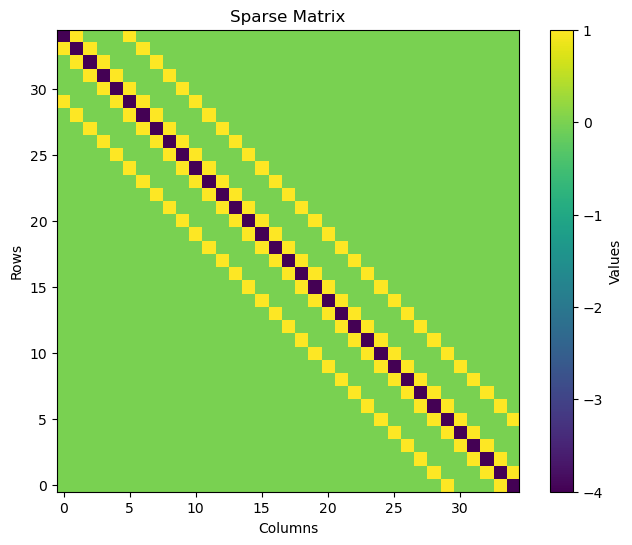

In [21]:
plt.figure(figsize=(8, 6))
#rotate the matrix to have the same orientation as the file
A = np.rot90(A)
plt.imshow(A, cmap='viridis', origin='lower')
plt.colorbar(label='Values')
plt.title('Sparse Matrix')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.grid(False)
plt.show()

In [17]:
A

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

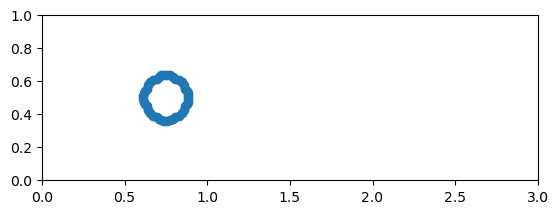

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# plot data of the form
# x1 y1
# x2 y2
# ...
filename = '../data/sample.txt'
data = np.loadtxt(filename)

plt.plot(data[:,0], data[:,1], 'o')

plt.xlim(0,3)
plt.ylim(0,1)

# axis ratio
plt.gca().set_aspect('equal', adjustable='box')

plt.show()